In [1]:
import osh5def
import osh5vis
import osh5io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_dir = Path('../simulations/raw_data/magshockz-v3.1.1d/MS')

def look_through_data(data_dir:Path, diagnostics:dict):
    for item in data_dir.rglob(''):
        item = item.relative_to(data_dir)
        dirs = item.as_posix().split('/')
        if len(dirs) > 1:
            diagnostics[item.as_posix()] = item.as_posix()

diagnostics = {}
look_through_data(data_dir, diagnostics)

fields = {
    'p1x1/electron' : f'{data_dir / diagnostics["PHA/p1x1/electron"]}/p1x1-electron',
    'p1x1/Silicon' : f'{data_dir / diagnostics["PHA/p1x1/Silicon"]}/p1x1-Silicon',
    'p1x1/Aluminum' : f'{data_dir / diagnostics["PHA/p1x1/Aluminum"]}/p1x1-Aluminum',
    # 'p2x1/electron' : f'{data_dir / diagnostics["PHA/p2x1/electron"]}/p2x1-electron',
    'p2x1/Silicon' : f'{data_dir / diagnostics["PHA/p2x1/Silicon"]}/p2x1-Silicon',
    'FLD/b1-savg' : f'{data_dir / diagnostics["FLD/b1-savg"]}/b1-savg',
    'FLD/b2-savg' : f'{data_dir / diagnostics["FLD/b2-savg"]}/b2-savg',
    'FLD/b3-savg' : f'{data_dir / diagnostics["FLD/b3-savg"]}/b3-savg',
    'DENSITY/Aluminum': f'{data_dir / diagnostics["DENSITY/Aluminum/charge"]}/charge-Aluminum',
    'DENSITY/Silicon': f'{data_dir / diagnostics["DENSITY/Silicon/charge"]}/charge-Silicon',
    'UDIST/Silicon/ufl1': f'{data_dir / diagnostics["UDIST/Silicon/ufl1"]}/ufl1-Silicon',
}

vlimits = {
    'p1x1/electron' : (0, 0.1),
    'p1x1/Silicon' : (0, 0.1),
    'p1x1/Aluminum' : (0, 10),
    'p2x1/electron' : (0, 0.1),
    'p2x1/Aluminum' : (0, 0.1),
    'p1x1/positron' : (0, 0.1),
    'FLD/b1-savg' : (-0.2, 0.2),
    'FLD/b2-savg' : (-0.1, 0.1),
    'FLD/b3-savg' : (-0.2, 0.2),
    'FLD/e1-savg' : (-0.08, 0.08),
    'FLD/e2-savg' : (-0.08, 0.08),
    'FLD/e3-savg' : (-0.04, 0.04),
    'DENSITY/aluminum': (0, 0.1),
    'DENSITY/Silicon': (0, 0.1),
    'UDIST/Silicon/ufl1': (-.1, 0.3),
}

In [ ]:
from make_movie_mp import movie


movie(fields['p1x1/Aluminum'], vlimits = vlimits['p1x1/Aluminum'],gyrotime=9570)

In [4]:
from make_stack_plots import make_joy_plot
from scipy.signal import savgol_filter

# Ensure the path to ion charge density files is correct
path_to_data = Path(fields['FLD/part_b3']).parent
time_slices = sorted(path_to_data.glob('*.h5'))
print(time_slices)

# Check if time_slices is not empty
if not time_slices:
    raise FileNotFoundError(f"No .h5 files found in {path_to_data}")

t = np.arange(len(time_slices))
data = []
times = []
for time_slice in time_slices:
    data_slice = osh5io.read_h5(f'{time_slice}')
    times.append(data_slice.run_attrs['TIME'][0]/625)
    # print(np.shape(data_slice))
    # data_slice_smoothed = savgol_filter(np.mean(data_slice,axis=0), window_length=30, polyorder=2)
    data_slice_smoothed = np.mean(data_slice,axis=0)
    data.append(data_slice_smoothed)

print(np.shape(data))
fig, ax = make_joy_plot(data, np.linspace(0,1875,np.shape(data)[1]), time_values=times, skip_steps=20,cmap = 'rainbow',y_spacing=.1,ylabel=r"$B_y [e{\frac {c/\omega _{p}}{m_{e}c^{2}}}]$",xlabel=r"$x [c/\omega_p]$")
plt.title(r"$\theta = 90$, $M = 25$, rqm = 25, Bz out of plane")
plt.show()

KeyError: 'FLD/part_b3'

In [16]:
data.attrs

AttributeError: 'list' object has no attribute 'attrs'

In [ ]:
data_0 = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electrons/charge"]}/charge-electrons-000000.h5')

data_0.run_attrs[]

{'simdir': '../raw_data/rqm25_M25_theta45.2d',
 'dirname': '../raw_data/rqm25_M25_theta45.2d/MS/DENSITY/electrons/charge',
 'extension': '.h5',
 'ITER': array([0], dtype=int32),
 'NAME': 'charge',
 'OFFSET_T': array([0.]),
 'OFFSET_X': array([0.5, 0.5]),
 'TIME': array([0.]),
 'TIME UNITS': osh5def.OSUnits at 0x747cf7fb2f90: ('m_e', 'c', '\\omega', 'e', 'n_0')=(0, 0, -1, 0, 0),
 'TYPE': 'grid',
 'SIMULATION': {'COMPILE_TIME': array([b'Feb 19 2025 17:02:09'], dtype='|S1024'),
  'DT': array([0.07]),
  'GIT_VERSION': array([b'4.4.4-292-gfe9aada-dirty'], dtype='|S1024'),
  'INPUT_FILE': array([b'input_file.txt'], dtype='|S1024'),
  'INPUT_FILE_CRC32': array([1.68560242e+09]),
  'MOVE C': array([0, 0], dtype=int32),
  'NDIMS': array([2], dtype=int32),
  'NX': array([4096,  512], dtype=int32),
  'PAR_NODE_CONF': array([4, 4], dtype=int32),
  'PAR_NX_X1': array([1024, 1024, 1024, 1024], dtype=int32),
  'PAR_NX_X2': array([128, 128, 128, 128], dtype=int32),
  'PERIODIC': array([0, 1], dtype=in

In [87]:
frame= 0
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{frame:06d}.h5')
b = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Aluminum/charge"]}/charge-Aluminum-{frame:06d}.h5')
a = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electron/charge"]}/charge-electron-{frame:06d}.h5')
# osh5vis.osplot(c,cmap = 'hot',title = r"$Zn_i$" + f", t = {round((c.run_attrs['TIME']/4781.497)[0],3)}" +  r"$\omega_{ci}^{-1}$",vmax = 9)
osh5vis.osplot(c+b+a,cmap = 'hot', title = r"$\rho_{total}$, t = " + f"{(c.run_attrs['TIME'])}")

KeyError: 'DENSITY/Magnesium/charge'

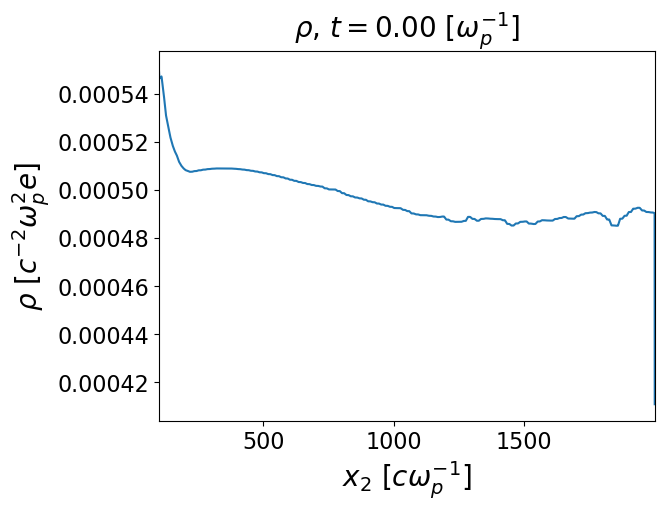

In [9]:
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{0:06d}.h5')
plot = osh5vis.osplot(c[:,100])


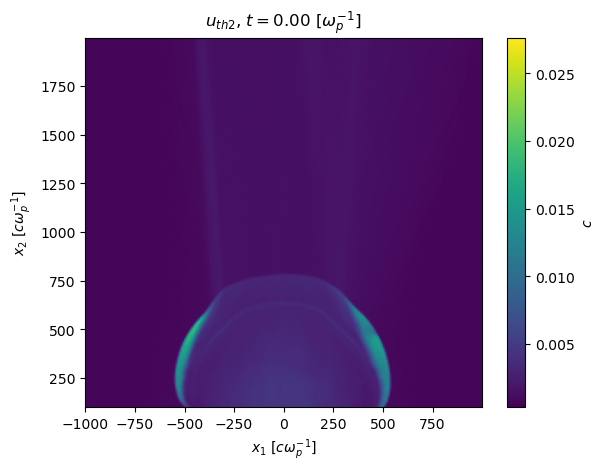

In [11]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/uth2/uth2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)